In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import os
import time
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
data_path = 'drive/My Drive/small'
data_dir_list = os.listdir(data_path)


In [ ]:
img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        #x = preprocess_input(x)
        x = x/255
        x[x<0.5]=0
        x[x>0.5]=1
        img_data_list.append(x)
        

Loaded the images of dataset-withoutcrack_small

Loaded the images of dataset-withcrack_small



In [ ]:
print(len(img_data_list))

2000


(2000, 1, 224, 224, 3)
(1, 2000, 224, 224, 3)
(2000, 224, 224, 3)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


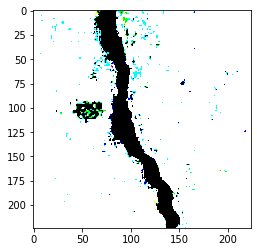

In [ ]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)
img_data[0].shape
plt.imshow(img_data[1000])
print(img_data[999])

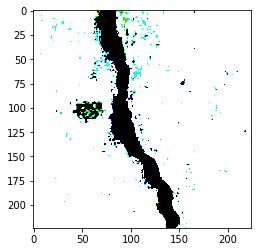

In [ ]:
plt.imshow(img_data[1000])


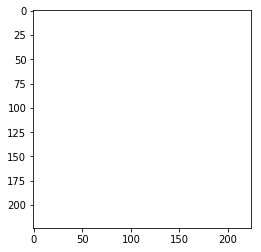

In [ ]:
plt.imshow(img_data[998])


In [ ]:
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:999]=0
labels[999:1999]=1

names = ['withoutcrack','withcrack']

In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
Y = np_utils.to_categorical(labels, num_classes)
print(Y)
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='drive/My Drive/weights/vgg16_weights_tf_dim_ordering_tf_kernels.h5')

model.summary()













Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)   

In [ ]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(256, activation='relu', name='fc1')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-2]:
      layer.trainable = False
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
custom_vgg_model2.compile(loss='binary_crossentropy',optimizer='adadelta',metrics=['accuracy'])
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_split=0.1)
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 1440 samples, validate on 160 samples
Epoch 1/10
1440/1440 [==============================] - 11s 7ms/step - loss: 1.8502 - acc: 0.8521 - val_loss: 0.0556 - val_acc: 0.9750
Epoch 2/10
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0596 - acc: 0.9812 - val_loss: 0.1416 - val_acc: 0.9687
Epoch 3/10
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0478 - acc: 0.9875 - val_loss: 0.0317 - val_acc: 0.9875
Epoch 4/10
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0423 - acc: 0.9882 - val_loss: 0.0291 - val_acc: 0.9875
Epoch 5/10
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0272 - acc: 0.9924 - val_loss: 0.0608 - val_acc: 0.9875
Epoch 6/10
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0144 - acc: 0.9965 - val_loss: 0.0403 - val_acc: 0.9875
Epoch 7/10
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0166 - acc: 0.9931 - val_loss: 0.0376 - val_acc: 0.9875
Epoch 8/

In [ ]:
#%%
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(10)#enter no of epochs

In [ ]:
train_loss


[1.8501557852752941,
 0.05958894427941333,
 0.04779382854129229,
 0.04232780233299612,
 0.027240262872017713,
 0.01444155506464363,
 0.016582772854405903,
 0.011993770774152621,
 0.00994951550198506,
 0.0073756934647401335]

In [ ]:
val_loss

[0.055609811202884885,
 0.1415548808663516,
 0.031661096021707635,
 0.029132942107025883,
 0.06082647444009126,
 0.040317908744327724,
 0.03764316946239887,
 0.05325762406937429,
 0.0550032868549124,
 0.045384374312561704]

In [ ]:
import pandas as pd

In [ ]:
train_loss=pd.DataFrame(train_loss)
val_loss=pd.DataFrame(val_loss)

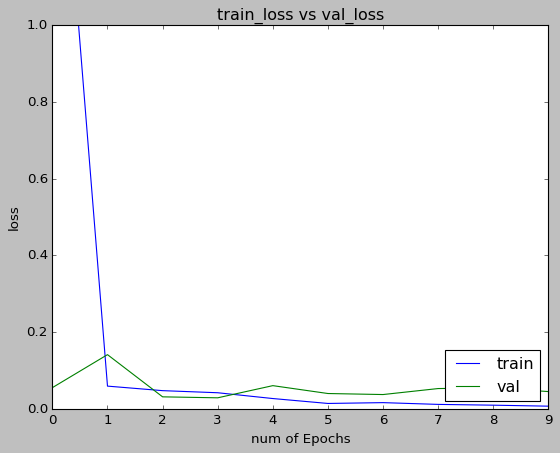

In [ ]:
plt.ylim(0,1,0.1)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.plot(train_loss.index,train_loss[0])
plt.plot(val_loss.index,val_loss[0])
plt.legend(['train','val'],loc=4)

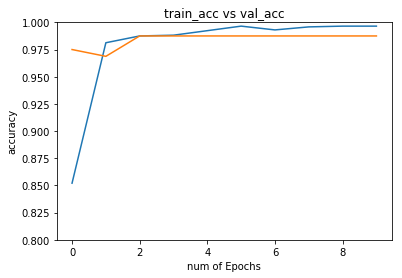

In [ ]:
train_acc=pd.DataFrame(train_acc)
val_acc=pd.DataFrame(val_acc)

plt.ylim(0.8,1,0.1)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.plot(train_acc.index,train_acc[0])
plt.plot(val_acc.index,val_acc[0])

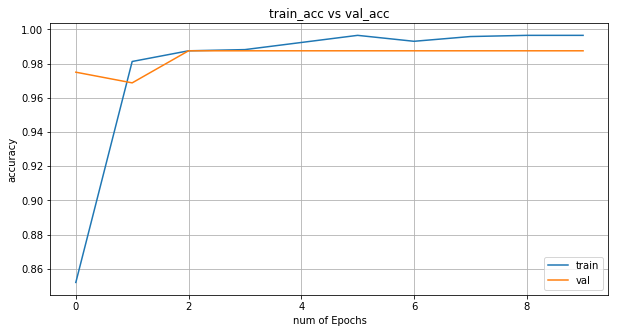

In [ ]:


plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

ValueError: ignored

In [ ]:
pred=custom_vgg_model2.predict(X_test)

In [ ]:
pred[0]

array([9.99984860e-01, 1.51049135e-05], dtype=float32)

In [ ]:
pred[pred>0.5]=1
pred[pred<1]=0

In [ ]:
y_test


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(y_test, pred)

0.9875

In [ ]:
y_test =pd.DataFrame(y_test)
pred =pd.DataFrame(pred)

In [ ]:
pred.head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
pd.value_counts(pred[0])

0.0    205
1.0    195
Name: 0, dtype: int64

In [ ]:
pd.value_counts(pred[1])

1.0    205
0.0    195
Name: 1, dtype: int64

In [ ]:
pd.value_counts(y_test[0])

0.0    201
1.0    199
Name: 0, dtype: int64

In [ ]:
pd.value_counts(y_test[1])

1.0    201
0.0    199
Name: 1, dtype: int64

In [ ]:
p=confusion_matrix(y_test[0], pred[0]) 

In [ ]:
q=confusion_matrix(y_test[1], pred[1]) 

In [ ]:
q

array([[194,   5],
       [  0, 201]])

In [ ]:
import seaborn as sn

Text(0.5, 24.999999999999986, 'predicted_class')

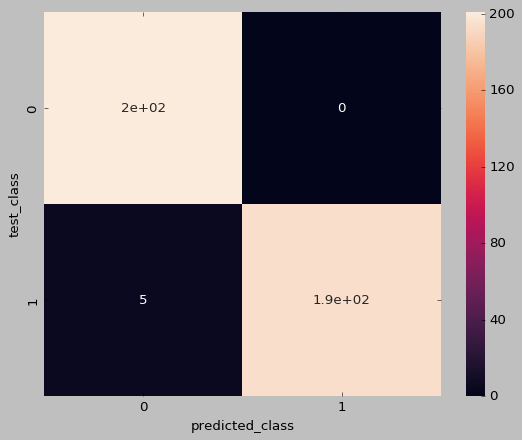

In [ ]:
p=pd.DataFrame(p)
ax=sn.heatmap(p, annot=True)
plt.ylabel('test_class')
plt.xlabel("predicted_class")

[Text(0, 0.5, 'cracked'), Text(0, 1.5, 'uncracked')]

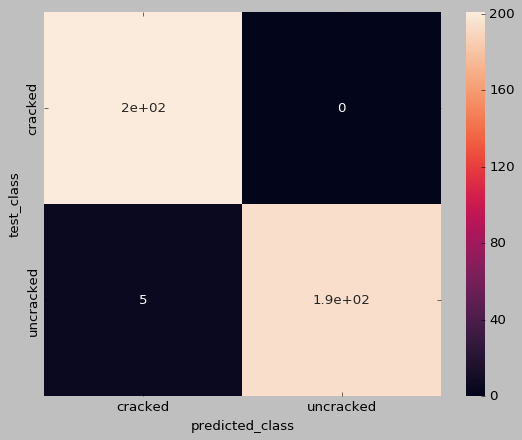

In [ ]:
p=pd.DataFrame(p)


In [ ]:
p=p/400

In [ ]:
p*100

,0,1
0,0.125625,0.00000
1,0.003125,0.12125


In [ ]:
p=p*100
p=p/400

In [ ]:
p

,0,1
0,50.25,0.0
1,1.25,48.5


[Text(0, 0.5, 'cracked'), Text(0, 1.5, 'uncracked')]

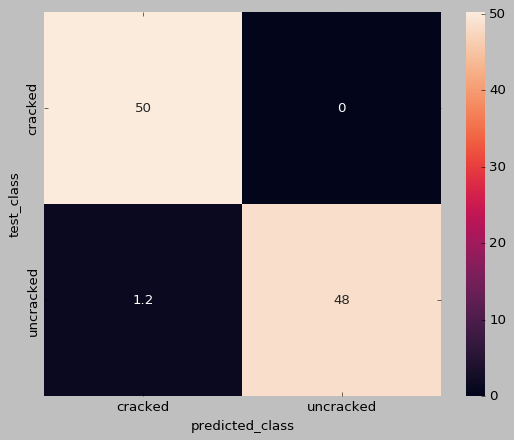

In [ ]:

ax=sn.heatmap(p, annot=True)
plt.ylabel('test_class')
plt.xlabel("predicted_class")
ax.xaxis.set_ticklabels(['cracked', 'uncracked']); ax.yaxis.set_ticklabels(['cracked', 'uncracked'])